# Problem 2 

In [5]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
import warnings
from sklearn.exceptions import UndefinedMetricWarning
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler
# Suppressing the UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

### Reading the Dataset

In [6]:
data_problem_2 = pd.read_csv("winequality-red.csv",delimiter = ";")
data_problem_2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Question: Which ensemble method is appropriate for predicting the quality of wine?


### EDA, Cleaning and Data Visualization

##### Check Summary of statistics

In [8]:
summary_stats = data_problem_2.describe()
display(summary_stats)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


##### Check distribution of wine quality 

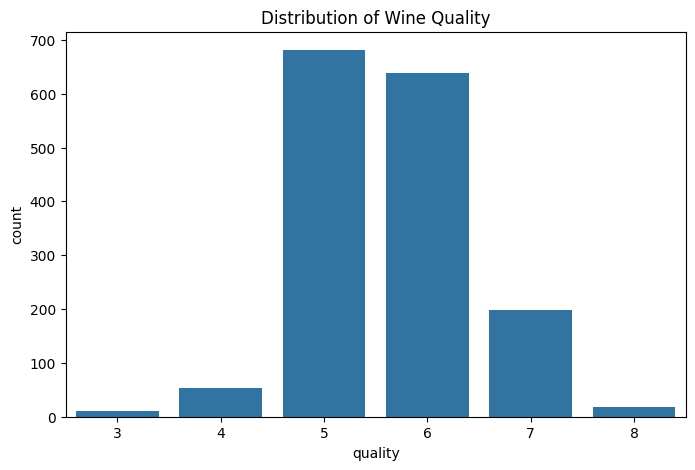

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=data_problem_2)
plt.title('Distribution of Wine Quality')
plt.show()

#####  Correlation Matrix

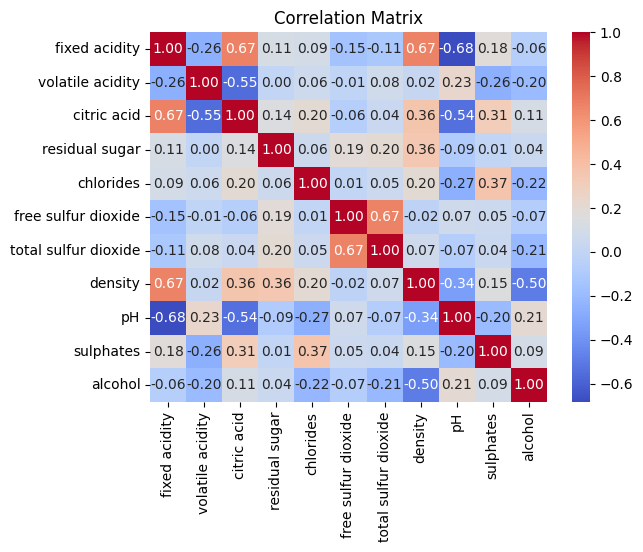

In [12]:
correlation_matrix = data_problem_2.drop(columns = "quality").corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [13]:
'''
Mostly, As we can see the correlation between independent variable is lower than 0.7. It means Multicollinearity is
not really high in almost independent variable 

'''

'\nMostly, As we can see the correlation between independent variable is lower than 0.7. It means Multicollinearity is\nnot really high in almost independent variable \n\n'

##### Train Test Split

In [36]:
new_data = data_problem_2.copy()

In [37]:
x = new_data.drop(columns = "quality")
y = new_data["quality"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)



##### Standard Scaler 

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)


##### Confusion Matrix Display

In [20]:
def confusion_matrix_display(y_true, y_pred, labels=None):
    print(f'accuracy score: {accuracy_score(y_true, y_pred)} ')
    print(classification_report(y_true, y_pred, target_names=labels))
    
    if labels is None:
        labels = sorted(set(y_true))
    
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax, xticklabels=labels, yticklabels=labels)
    ax.set_title('Confusion Matrix')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    plt.show()

## ENSEMBLE LEARNING 

##### Bagging 

In [21]:
base_classifier = DecisionTreeClassifier()
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)
bagging_classifier.fit(X_train_scaled, y_train)
bagging_y_pred_train = bagging_classifier.predict(X_train_scaled)
bagging_y_pred_test = bagging_classifier.predict(X_test_scaled)

accuracy score: 0.983580922595778 
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        42
           5       0.98      0.99      0.99       546
           6       0.99      0.98      0.98       496
           7       0.98      0.98      0.98       172
           8       1.00      0.87      0.93        15

    accuracy                           0.98      1279
   macro avg       0.99      0.97      0.98      1279
weighted avg       0.98      0.98      0.98      1279



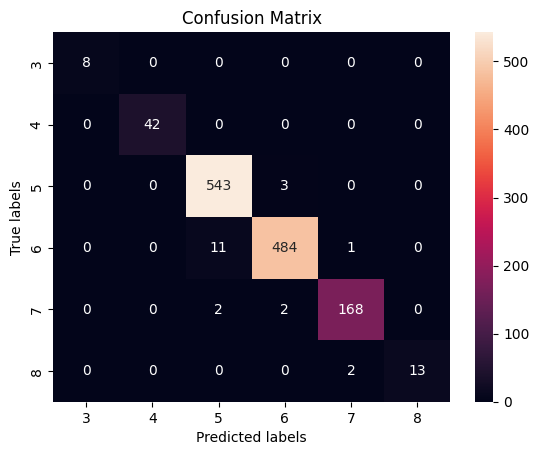

In [22]:
## Train Data 
confusion_matrix_display(y_train, bagging_y_pred_train)

accuracy score: 0.71875 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.73      0.83      0.78       135
           6       0.77      0.71      0.74       142
           7       0.57      0.63      0.60        27
           8       0.00      0.00      0.00         3

    accuracy                           0.72       320
   macro avg       0.34      0.36      0.35       320
weighted avg       0.69      0.72      0.70       320



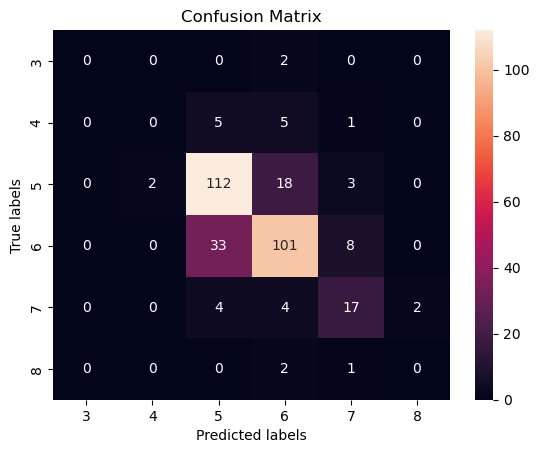

In [62]:
## Test Data 
confusion_matrix_display(y_test, bagging_y_pred_test)

##### Boosting


In [23]:
base_classifier = DecisionTreeClassifier()

# Create an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

# Fit the model on the scaled training data
adaboost_classifier.fit(X_train_scaled, y_train)

# Predict on the scaled test data
adaboost_y_pred_test = adaboost_classifier.predict(X_test_scaled)
adaboost_y_pred_train = adaboost_classifier.predict(X_train_scaled)

accuracy score: 1.0 
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        42
           5       1.00      1.00      1.00       546
           6       1.00      1.00      1.00       496
           7       1.00      1.00      1.00       172
           8       1.00      1.00      1.00        15

    accuracy                           1.00      1279
   macro avg       1.00      1.00      1.00      1279
weighted avg       1.00      1.00      1.00      1279



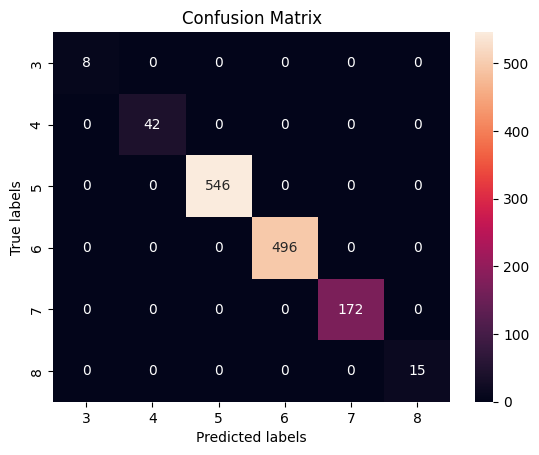

In [24]:
## Train Data 
confusion_matrix_display(y_train, adaboost_y_pred_train)

accuracy score: 0.678125 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.33      0.27      0.30        11
           5       0.76      0.76      0.76       135
           6       0.72      0.66      0.69       142
           7       0.44      0.67      0.53        27
           8       0.00      0.00      0.00         3

    accuracy                           0.68       320
   macro avg       0.38      0.39      0.38       320
weighted avg       0.69      0.68      0.68       320



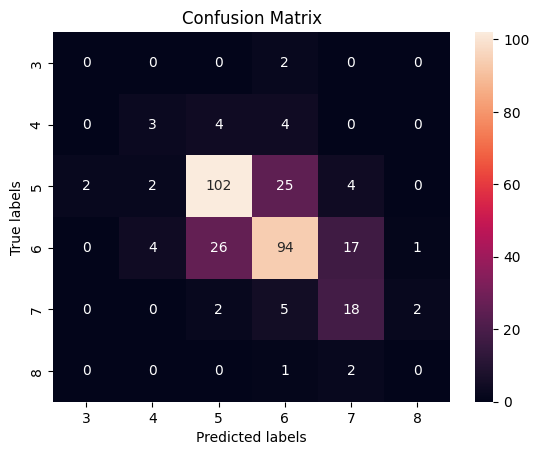

In [25]:
## Test Data 
confusion_matrix_display(y_test, adaboost_y_pred_test)

##### Voting

In [26]:
classifier1 = DecisionTreeClassifier(random_state=42)
classifier2 = RandomForestClassifier(random_state=42)
classifier3 = GradientBoostingClassifier(random_state=42)
classifier4 = SVC(random_state=42,probability=True)  # Add SVC
classifier5 = XGBClassifier(random_state=42)


voting_classifier = VotingClassifier(
    estimators=[
        ('dt', classifier1),
        ('rf', classifier2),
        ('gb', classifier3),
        ('svc', classifier4),
        ('xgb', classifier5)
    ],
    voting='hard'  # 'hard' for majority vote, 'soft' for weighted average based on probabilities
)

# Fit the model on the scaled training data
voting_classifier.fit(X_train_scaled, y_train)

voting_y_pred_train = voting_classifier.predict(X_train_scaled)
voting_y_pred_test = voting_classifier.predict(X_test_scaled)

accuracy score: 1.0 
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        42
           5       1.00      1.00      1.00       546
           6       1.00      1.00      1.00       496
           7       1.00      1.00      1.00       172
           8       1.00      1.00      1.00        15

    accuracy                           1.00      1279
   macro avg       1.00      1.00      1.00      1279
weighted avg       1.00      1.00      1.00      1279



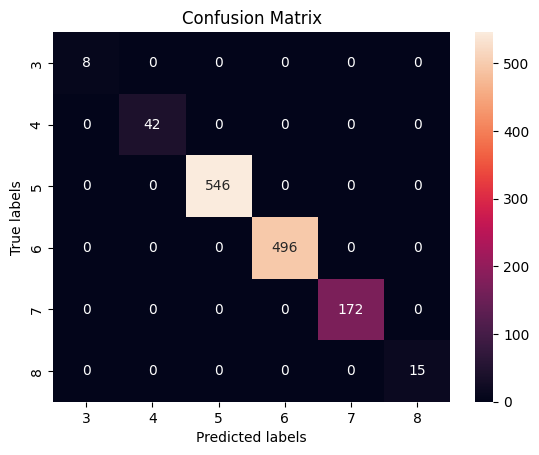

In [29]:
## Train Data 
confusion_matrix_display(y_train, voting_y_pred_train)

accuracy score: 0.73125 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.75      0.84      0.79       135
           6       0.76      0.73      0.75       142
           7       0.59      0.63      0.61        27
           8       0.00      0.00      0.00         3

    accuracy                           0.73       320
   macro avg       0.35      0.37      0.36       320
weighted avg       0.70      0.73      0.72       320



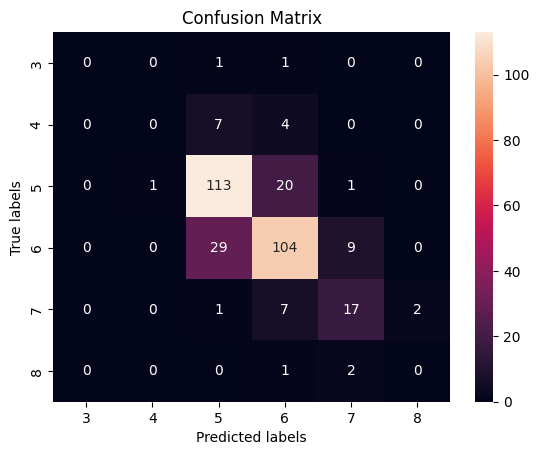

In [30]:
## Test Data 
confusion_matrix_display(y_test, voting_y_pred_test)

##### Stacking 

In [31]:
# Assuming you have classifiers, you can replace these with your chosen classifiers
base_classifiers = [
    ('dt' , DecisionTreeClassifier(random_state=42)),
    ('rf' , RandomForestClassifier(random_state=42)),
    ('gb' , GradientBoostingClassifier(random_state=42)),
    ('svc',SVC(random_state=42,probability=True)),
    ('xgb',XGBClassifier(random_state=42)),
]

# Choose a meta-classifier for stacking
meta_classifier = RandomForestClassifier(random_state=42)


stacking_classifier = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=meta_classifier
)

stacking_classifier.fit(X_train_scaled, y_train)

stacking_y_pred_train = stacking_classifier.predict(X_train_scaled)
stacking_y_pred_test = stacking_classifier.predict(X_test_scaled)

accuracy score: 0.9577795152462861 
              precision    recall  f1-score   support

           3       1.00      0.12      0.22         8
           4       0.00      0.00      0.00        42
           5       0.94      1.00      0.97       546
           6       0.97      1.00      0.98       496
           7       0.99      1.00      1.00       172
           8       1.00      0.87      0.93        15

    accuracy                           0.96      1279
   macro avg       0.82      0.66      0.68      1279
weighted avg       0.93      0.96      0.94      1279



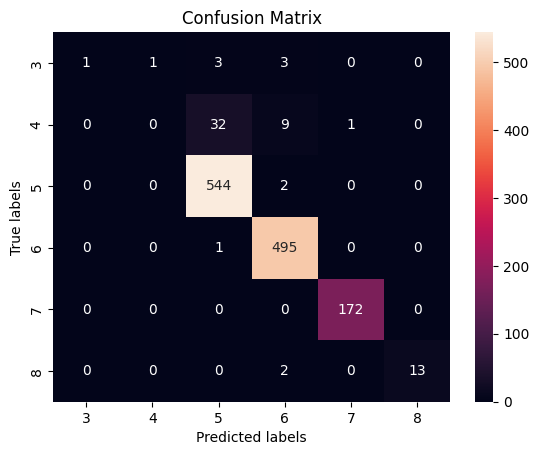

In [35]:
## Train Data 
confusion_matrix_display(y_train, stacking_y_pred_train)

accuracy score: 0.7 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.73      0.76      0.74       135
           6       0.68      0.73      0.71       142
           7       0.62      0.67      0.64        27
           8       0.00      0.00      0.00         3

    accuracy                           0.70       320
   macro avg       0.34      0.36      0.35       320
weighted avg       0.67      0.70      0.68       320



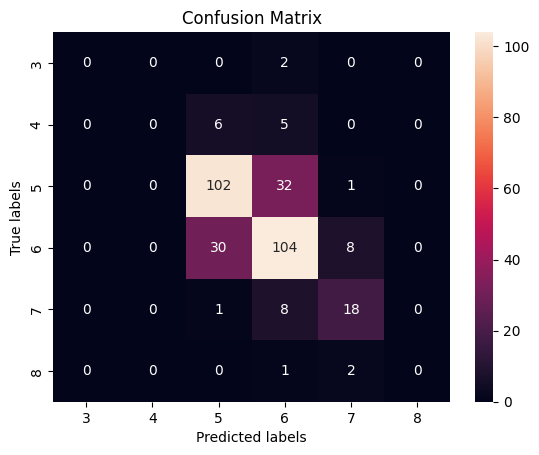

In [34]:
## Test Data 
confusion_matrix_display(y_test, stacking_y_pred_test)